In [37]:
import numpy as np 
import cv2 as cv 
from matplotlib import pyplot as plt

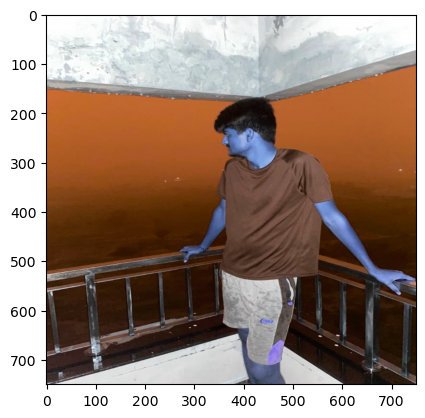

In [38]:
img1=cv.imread("original.jpeg")
img1=cv.resize(img1,(750,750))
plt.imshow(img1)

In [39]:
print(img1.shape)

(750, 750, 3)


In [40]:
print("This area is used for segmentation Region of intrest")
x1=int(input("enter the input x1 "))
y1=int(input("enter the input y1 "))
x2=int(input("enter the input x2 "))
y2=int(input("enter the input y2 "))
mask = np.zeros(img1.shape[:2], np.uint8)
rect = (x1, y1, x2, y2)
mask[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]] = 1
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv.grabCut(img1, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = img1* mask2[:, :, np.newaxis]

This area is used for segmentation Region of intrest


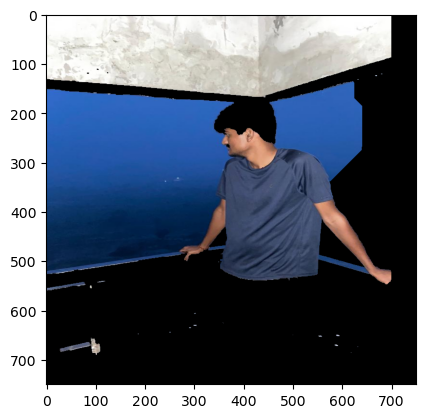

In [41]:
segmented_image=cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB)
plt.imshow(segmented_image)

In [42]:
back=cv.imread("DarkValley.jpg")
print(back.shape)

(627, 1200, 3)


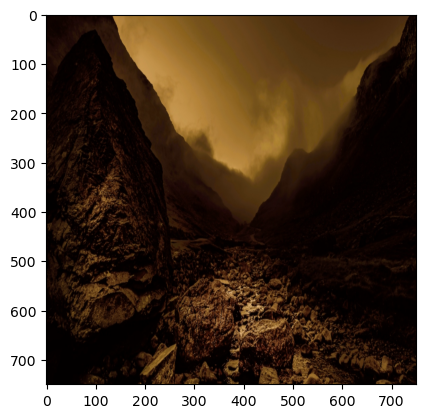

In [43]:
back=cv.resize(back,(750,750))
plt.imshow(back)

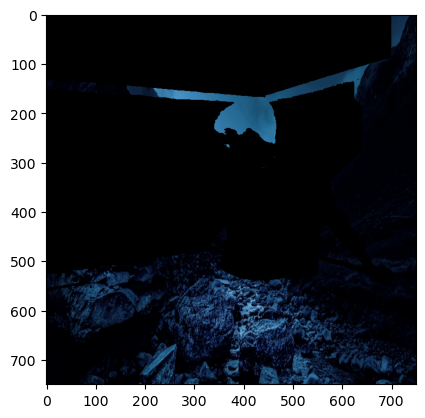

In [44]:
mask3=1-mask2
masked=cv.bitwise_and(back,back,mask=mask3)
masked=cv.cvtColor(masked,cv.COLOR_BGR2RGB)
plt.imshow(masked)

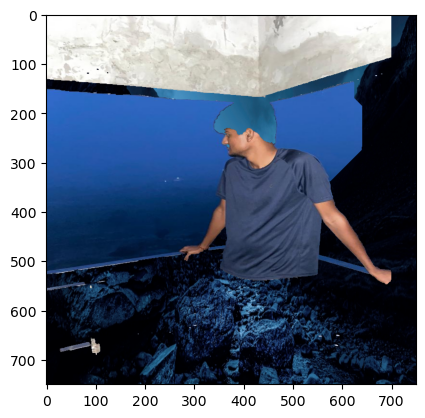

In [45]:
merge=masked+segmented_image
plt.imshow(merge)